<p style="padding:14px;border-radius:19px 1px;background-color:#0474b0;margin:0;color:#fafafa;border:4px outline #0d0c0d;font-family:Georgia;font-weight: bold;font-size:140%;text-align:center;overflow:hidden;font-weight:500">SMS Spam Detection</p>

<img src="https://editor.analyticsvidhya.com/uploads/32086heading.jpeg" alt="Spam or ham" width="550" height="300">

<p style="padding:8px; background-color:#0474b0;font-family:newtimeroman;color:#fafafa;font-size:100%;border-radius:19px 1px;"> 📌 Table of Contents</p>

<div style="border-radius:10px;;padding: 15px;color:#10457a;font-size:110%;text-align:left">
       
* [1. Importing Libraries](#1)
    
* [2. Reading Data](#2)
    
* [3. Data Preprocessing-I](#3)
    * [3.1 Label Encoding](#3.1)
    * [3.2 Feature Engineering](#3.2)
    
* [4. Exploratory Analysis](#4)
    
* [5. Data Preprocessing-II](#5)
    * [5.1 Converting text into Lower Case](#5.1)
    * [5.2 Tokenization](#5.2)
    * [5.3 Removing stopwords and Punctuation ](#5.3)
    * [5.4 Stemming](#5.4) 
    
* [6. Vectorization ](#6)
    
* [7. Model Training](#7)
    
* [8. Model Evaluation](#8)
 
* [9. Testing Model](#9)   

 <a id="1"></a>
### <p style="padding:7px; background-color:#0474b0;font-family:newtimeroman;color:#fafafa;font-size:100%;border-radius:19px 1px;"> Importing Libraries 📚</p>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
from nltk import sent_tokenize
from sklearn.preprocessing import LabelEncoder
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maryam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


 <a id="2"></a>
### <p style="padding:7px; background-color:#0474b0;font-family:newtimeroman;color:#fafafa;font-size:100%;border-radius:19px 1px;"> Reading Data 📖</p>

In [2]:
#import dataset
df = pd.read_csv("C:\\Users\\Maryam\\Downloads\\spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


 <a id="3"></a>
### <p style="padding:7px; background-color:#0474b0;font-family:newtimeroman;color:#fafafa;font-size:100%;border-radius:19px 1px;"> Data Preprocessing- Ⅰ 🛠</p>

In [3]:
#shape of dataset
print(f"The dataset has {df.shape[0]} columns and {df.shape[1]} rows.")

The dataset has 5572 columns and 5 rows.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.shape

(5572, 2)

In [7]:
df.rename(columns={'v2':'sms', 'v1':'target'},inplace=True)

In [8]:
df.describe()

,target,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df.isnull().sum()

target    0
sms       0
dtype: int64

In [10]:
df.duplicated().sum()

403

In [11]:
df.drop_duplicates(keep='first',inplace=True)

 <a id="3.1"></a>
### <p style="padding:7px; background-color:#0474b0;font-family:newtimeroman;color:#fafafa;font-size:100%;border-radius:19px 1px;"> Label Encoding</p>

In [12]:
# Label encoding on target column
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

 <a id="3.2"></a>
### <p style="padding:7px; background-color:#0474b0;font-family:newtimeroman;color:#fafafa;font-size:100%;border-radius:19px 1px;"> Feature Enginnering</p>

In [13]:
# Number of charcters in text
df['text_charac'] = df['sms'].apply(len)

In [14]:
df.head()

,target,sms,text_charac
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
# Create a new column 'word_count' that contains the number of words in each SMS
df['word_count'] = df['sms'].apply(lambda x: len(str(x).split()))

In [16]:
df['sms'][1]

'Ok lar... Joking wif u oni...'

In [17]:
# Sentences in text
df['sentence_count'] = df['sms'].apply(lambda x: len(sent_tokenize(x)))

In [18]:
df.head()

,target,sms,text_charac,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


 <a id="4"></a>
### <p style="padding:7px; background-color:#0474b0;font-family:newtimeroman;color:#fafafa;font-size:100%;border-radius:19px 1px;"> Exploratory Analysis</p>

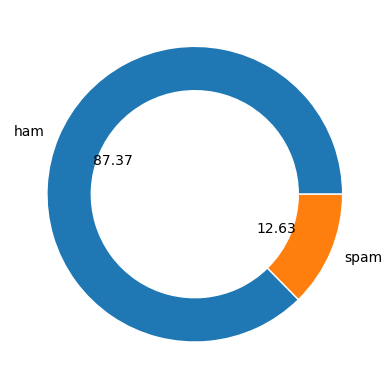

In [19]:
plt.pie(df.target.value_counts(), labels=['ham','spam'], autopct='%.02f', wedgeprops=dict(width=.3, edgecolor='w'))
plt.show()

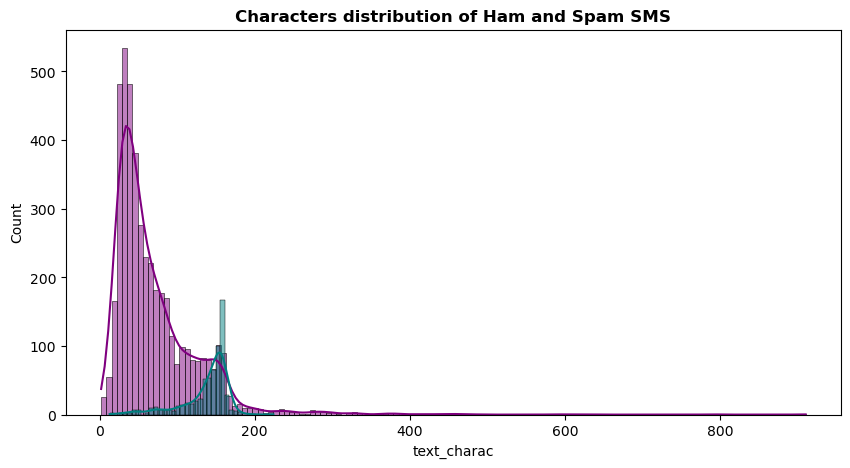

In [20]:
#fig, ax = plt.subplots(1,2, figsize=(10, 5))
plt.figure(figsize=(10, 5))
sns.histplot(df[df['target']==0]['text_charac'],color='purple' ,kde=True)
sns.histplot(df[df['target']==1]['text_charac'], kde=True, color='teal')
plt.title("Characters distribution of Ham and Spam SMS", fontweight='bold')
#ax[1].set_title("Characters distribution in spam sms", fontweight='bold')

plt.show()

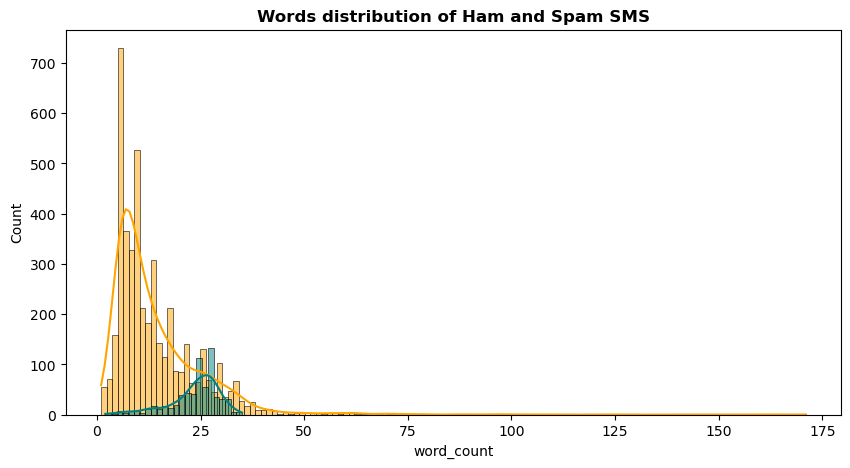

In [21]:
#fig, ax = plt.subplots(1,2, figsize=(10, 5))
plt.figure(figsize=(10, 5))
sns.histplot(df[df['target']==0]['word_count'],color='orange' ,kde=True)
sns.histplot(df[df['target']==1]['word_count'], kde=True, color='teal')
plt.title("Words distribution of Ham and Spam SMS", fontweight='bold')
#ax[1].set_title("Characters distribution in spam sms", fontweight='bold')

plt.show()

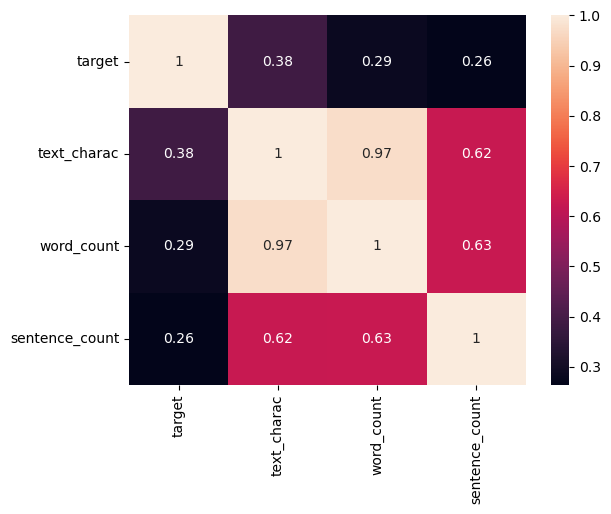

In [22]:
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

In [23]:
df[df.target==0].describe()

,target,text_charac,word_count,sentence_count
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,14.134632,1.820195
std,0.0,56.358207,11.116240,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,7.000000,1.000000
50%,0.0,52.000000,11.000000,1.000000
75%,0.0,90.000000,18.000000,2.000000
max,0.0,910.000000,171.000000,38.000000


In [24]:
df[df.text_charac==910]

,target,sms,text_charac,word_count,sentence_count
1084,0,For me the love should start with attraction.i...,910,171,1


In [25]:
df['sms'][1084]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [26]:
df[df.target==1].describe()

,target,text_charac,word_count,sentence_count
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,23.681470,2.970904
std,0.0,30.137753,5.967672,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,22.000000,2.000000
50%,1.0,149.000000,25.000000,3.000000
75%,1.0,157.000000,28.000000,4.000000
max,1.0,224.000000,35.000000,9.000000


In [27]:
print(df['sms'][1020],'\n')

print(df['sms'][1733])

Good afternoon on this glorious anniversary day, my sweet J !! I hope this finds you happy and content, my Prey. I think of you and send a teasing kiss from across the sea coaxing images of fond souveniers ... You Cougar-Pen 

Hi, this is Mandy Sullivan calling from HOTMIX FM...you are chosen to receive å£5000.00 in our Easter Prize draw.....Please telephone 09041940223 to claim before 29/03/05 or your prize will be transferred to someone else....


 <a id="5"></a>
### <p style="padding:7px; background-color:#0474b0;font-family:newtimeroman;color:#fafafa;font-size:100%;border-radius:19px 1px;"> Data Preprocessing- Ⅱ 🛠</p>

<a id="5.1"></a>
### <b style="color:#10457a;font-family:newtimeroman;font-size:100%">→ Converting text into Lower Case</b>

<a id="5.2"></a>
### <b style="color:#10457a;font-family:newtimeroman;font-size:100%">→ Tokenization</b>

<a id="5.3"></a>
### <b style="color:#10457a;font-family:newtimeroman;font-size:100%">→ Removing stopwords and Punctuation</b>

<a id="5.4"></a>
### <b style="color:#10457a;font-family:newtimeroman;font-size:100%">→ Stemming</b>


In [28]:

def transform_sms(text):
    # Step 1: Convert to lowercase and remove punctuation
    text = text.lower()
    text = ''.join(char for char in text if char not in string.punctuation)
    
    # Step 2: Tokenize the text
    text = nltk.word_tokenize(text)
    
    # Step 3: Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    
    # Step 4: Apply stemming
    stemmer = PorterStemmer()
    text = [stemmer.stem(word) for word in text]
    
    return ' '.join(text)

In [29]:
transform_sms('I\'m gonna be home soon and I don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today.')

'im gon na home soon dont want talk stuff anymor tonight k ive cri enough today'

In [30]:
# Transforming SMS column
df['transform_sms'] = df['sms'].apply(transform_sms)

In [31]:
df.head()

,target,sms,text_charac,word_count,sentence_count,transform_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah dont think goe usf live around though


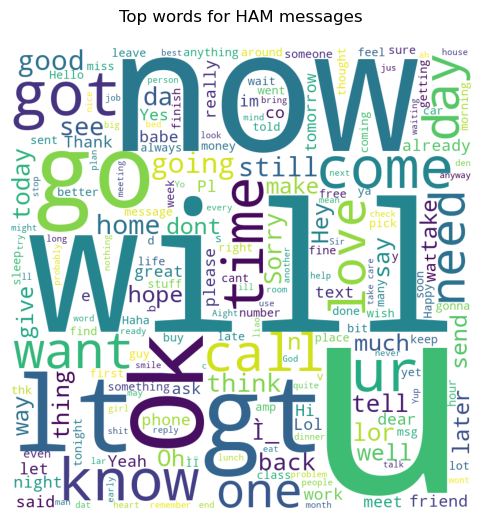

In [32]:
# Generating word cloud of Ham messages
non_spam_text = ' '.join(df[df['target'] == 0]['sms'])

wc = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(non_spam_text)
plt.figure(figsize=(10,6))
plt.title('Top words for HAM messages\n')
plt.imshow(wc)
plt.axis('off')
plt.show()

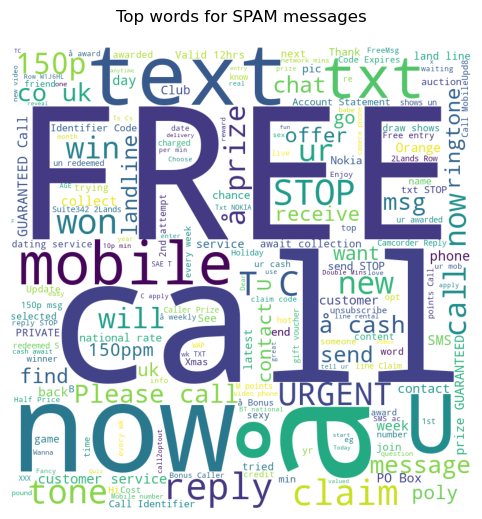

In [61]:
# Generating word cloud of spam messages
spam_text = ' '.join(df[df['target'] == 1]['sms'])

wc = WordCloud(width=800, height=800, background_color='white',min_font_size=10).generate(spam_text)
plt.figure(figsize=(10,6))
plt.title('Top words for SPAM messages\n')
plt.imshow(wc)
plt.axis('off')
plt.show()

 <a id="6"></a>
### <p style="padding:7px; background-color:#0474b0;font-family:newtimeroman;color:#fafafa;font-size:100%;border-radius:19px 1px;">    Vectorization</p>

- Bag of Words with Count Vectorizer
- TF-IDF

In [34]:
# TF-IDF & Count Vectorization
# I trained the model on both tf-idf and count vectorizer, TF-IDF gave me best result

In [35]:
cv = CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)
#scaler = MinMaxScaler()

X = tfidf.fit_transform(df['transform_sms']).toarray()
#X= scaler.fit_transform(X)

y = df['target'].values

 <a id="7"></a>
### <p style="padding:7px; background-color:#0474b0;font-family:newtimeroman;color:#fafafa;font-size:100%;border-radius:19px 1px;"> Model Training ⚙</p>

In [36]:
# Splitting rows randomly into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=1)


In [37]:
# Classifiers I'm using
mnb =  MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()
rfc = RandomForestClassifier()
lr =  LogisticRegression()

## <b style="color:#10457a;font-family:newtimeroman;font-size:100%">→  Multinomial Naive Bayes</b>

In [38]:
# MultinomialNB
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)

In [39]:
mnb_Accuracy = (accuracy_score(y_test, y_pred1))
print("mnb_Accuracy: ", mnb_Accuracy)

mnb_Precision = (precision_score(y_test, y_pred1))
print("mnb_Precision: ", mnb_Precision)

print("mnb_Confusion:\n" ,confusion_matrix(y_test, y_pred1))

mnb_Accuracy:  0.9671179883945842
mnb_Precision:  1.0
mnb_Confusion:
 [[899   0]
 [ 34 101]]


## <b style="color:#10457a;font-family:newtimeroman;font-size:100%">→  Bernoulli Naive Bayes</b>

In [40]:
# BernoulliNB
bnb.fit(X_train, y_train)
y_pred2 = bnb.predict(X_test)

In [41]:
bnb_Accuracy = (accuracy_score(y_test, y_pred2))
print("bnb_Accuracy: ", bnb_Accuracy)

bnb_precision = (precision_score(y_test, y_pred2))
print("bnb_Precision: " ,bnb_precision)

print("bnb_Confusion Matrix:\n" ,confusion_matrix(y_test, y_pred2))

bnb_Accuracy:  0.9748549323017408
bnb_Precision:  0.9823008849557522
bnb_Confusion Matrix:
 [[897   2]
 [ 24 111]]


## <b style="color:#10457a;font-family:newtimeroman;font-size:100%">→  Random Forest Classifier</b>

In [42]:
# RandomForestClassifier
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)

In [43]:
RFC_Accuracy = (accuracy_score(y_test, y_pred3))
print("rfc_Accuracy: ", RFC_Accuracy)

RFC_precision = (precision_score(y_test, y_pred3))
print("rfc_Precision: " ,RFC_precision)

print("rfc_Confusion Matrix:\n" ,confusion_matrix(y_test, y_pred3))

rfc_Accuracy:  0.9709864603481625
rfc_Precision:  0.9906542056074766
rfc_Confusion Matrix:
 [[898   1]
 [ 29 106]]


## <b style="color:#10457a;font-family:newtimeroman;font-size:100%">→  SVC</b>

In [44]:
# SVC
svc = SVC(kernel='sigmoid',random_state=1,gamma=1.0)
svc.fit(X_train, y_train)
y_pred4 = svc.predict(X_test)

In [45]:
SVC_Accuracy = (accuracy_score(y_test, y_pred4))
print("SVC_Accuracy: " ,SVC_Accuracy)

SVC_Precision = (precision_score(y_test, y_pred4))
print("SVC_Precision: " ,SVC_Precision)

print("SVC_Confusion Matrix:\n" ,confusion_matrix(y_test, y_pred4))

SVC_Accuracy:  0.9729206963249516
SVC_Precision:  0.9572649572649573
SVC_Confusion Matrix:
 [[894   5]
 [ 23 112]]


## <b style="color:#10457a;font-family:newtimeroman;font-size:100%">→  Logistic Regression</b>

In [46]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred5 = lr.predict(X_test)

In [47]:
LR_Accuracy = (accuracy_score(y_test, y_pred5))
print("LR_Accuracy: " , LR_Accuracy)
LR_Precision = precision_score(y_test, y_pred5)
print("LR_Precision: " ,LR_Precision)

print("LR_Confusion Matrix:\n" ,confusion_matrix(y_test, y_pred5))

LR_Accuracy:  0.9429400386847195
LR_Precision:  0.9523809523809523
LR_Confusion Matrix:
 [[895   4]
 [ 55  80]]


## <b style="color:#10457a;font-family:newtimeroman;font-size:100%">→  Voting Classifier </b>

In [48]:
clf1 = MultinomialNB()
clf2 = BernoulliNB()
clf3 = RandomForestClassifier()

voting = VotingClassifier(estimators=[('mnb', clf1), ('bnb', clf2), ('rfc', clf3)], voting='hard')

voting.fit(X_train, y_train)


VotingClassifier(estimators=[('mnb', MultinomialNB()), ('bnb', BernoulliNB()),
                             ('rfc', RandomForestClassifier())])

In [49]:
voting_pred = voting.predict(X_test)

voting_accuracy = accuracy_score(y_test, voting_pred)
print("Voting Accuracy", voting_accuracy)

voting_precision = precision_score(y_test, voting_pred)
print("Voting Accuracy", voting_precision)


Voting Accuracy 0.9729206963249516
Voting Accuracy 1.0


 <a id="8"></a>
### <p style="padding:7px; background-color:#0474b0;font-family:newtimeroman;color:#fafafa;font-size:100%;border-radius:19px 1px;"> Model Evaluation 🔍</p>

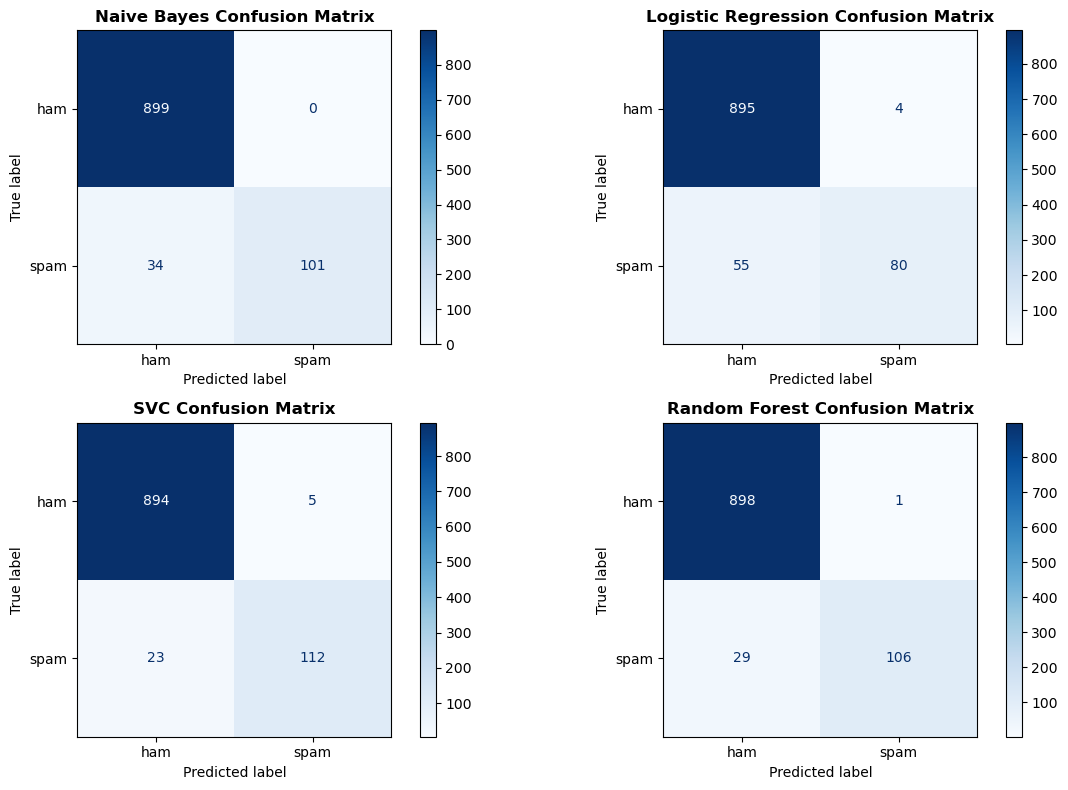

In [60]:
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(kernel='sigmoid',random_state=1,gamma=1.0)}

classifiers = [mnb, lr, svc, rfc]
classifier_names = ["Naive Bayes", "Logistic Regression", "SVC", 'Random Forest']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Iterate through the classifiers and plot their confusion matrices
for (clf, clf_name), ax in zip(zip(classifiers, classifier_names), axes.ravel()):
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham', 'spam'])
    disp.plot(ax=ax, cmap=plt.cm.Blues, values_format=".4g")
    ax.set_title(f"{clf_name} Confusion Matrix", fontweight='bold')

plt.tight_layout()

plt.show()


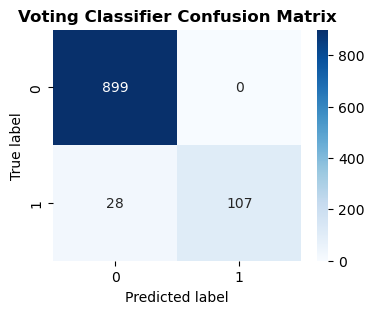

In [63]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, voting_pred), annot=True, cmap=plt.cm.Blues,fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label' )
plt.title("Voting Classifier Confusion Matrix", fontweight='bold')
plt.show()

In [52]:
# Comparing models according to their Accuracy Score & Precision Score
Model_result = pd.DataFrame({
    'Classifier': ['Logistic Regression ', 'Random Forest Classifier', 'SVM', 'Multinomial Naive Bayes', 
                   'Bernuolli Naive Bayes', 'Voting Classifier'],
    'Accuracy': [LR_Accuracy, RFC_Accuracy, SVC_Accuracy, mnb_Accuracy, bnb_Accuracy, voting_accuracy ],
    'Precision': [LR_Precision,RFC_precision, SVC_Precision, mnb_Precision, bnb_precision, voting_precision]})
Model_result.sort_values(by='Precision', ascending=False)

,Classifier,Accuracy,Precision
3,Multinomial Naive Bayes,0.967118,1.000000
5,Voting Classifier,0.972921,1.000000
1,Random Forest Classifier,0.970986,0.990654
4,Bernuolli Naive Bayes,0.974855,0.982301
2,SVM,0.972921,0.957265
0,Logistic Regression,0.942940,0.952381


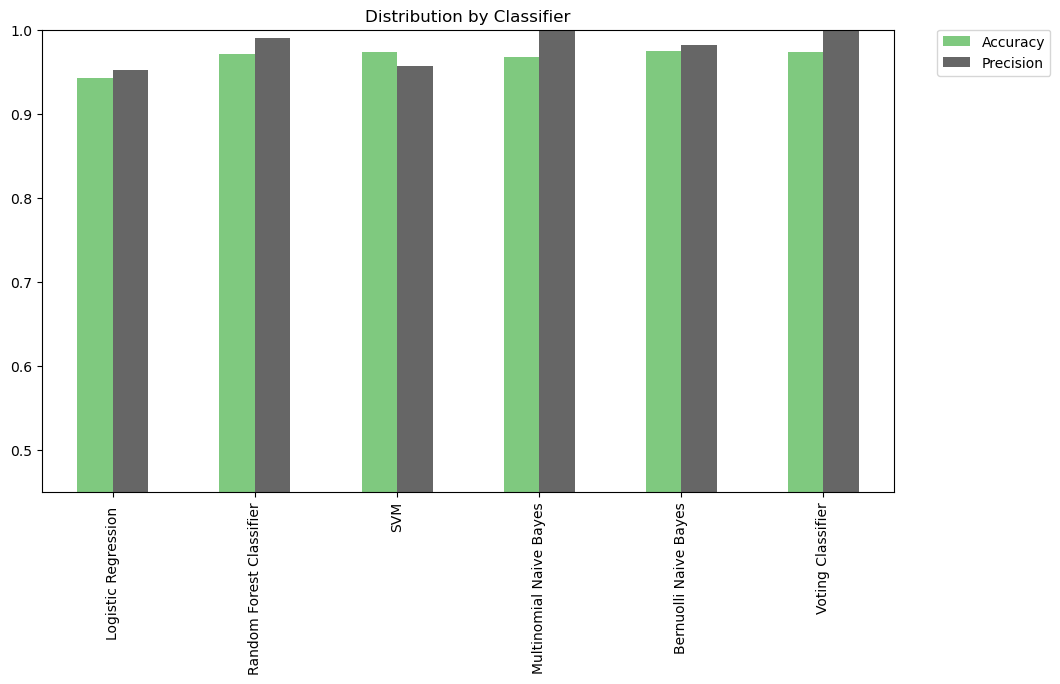

In [53]:
Model_result.plot(kind='bar', ylim=(0.45,1), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(6), Model_result['Classifier'])
#plt.ylabel()
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

➞ Voting Classifier and Multinomial NaiveBayes are performing best.

➞ Voting Classifier achieved higher Accuracy and Precision Score, suggesting that it is better at detecting SMS as spam or legitimate(ham)

 <a id="9"></a>
### <p style="padding:7px; background-color:#0474b0;font-family:newtimeroman;color:#fafafa;font-size:100%;border-radius:19px 1px;"> Model Testing 📑</p>

## Text ➞  Preprocess ➞ Vectorize ➞ Predict ➞ Spam/Ham 

In [57]:
input_sms = input("Enter the Message: \n")
transform_input =  transform_sms(input_sms)
vectorize = tfidf.transform([transform_input])
result = voting.predict(vectorize)[0]
if result == 1:
    print('Spam SMS 👿')
else:
    print('Not a Spam SMS 😊')

Enter the Message: 
Our records indicate that you have overpaid for (a product or service). Please provide us with your bank routing and account number to expedite your refund.
Spam SMS 👿


In [55]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(voting, open('model.pkl','wb'))

## 👉 Here's my Streamlit App

![Image Alt Text](streamlit.png)